In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy as sp
from joblib import dump, load

In [65]:
# Задача. Хотим узнать, какая связь между каждым каналом рекламы (ТВ, радио, газеты) и продажами

In [66]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


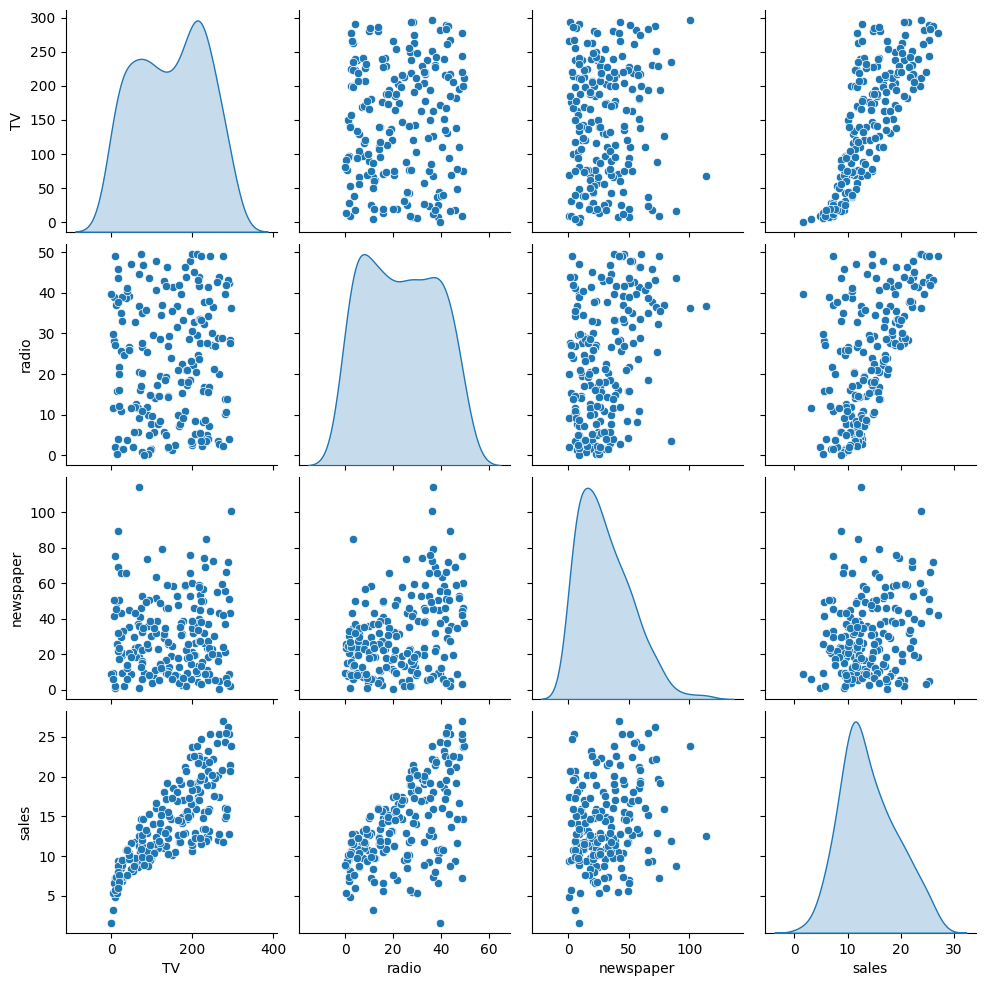

In [67]:
# Связи между признаками
sns.pairplot(df,diag_kind='kde');

In [68]:
Y = df['sales'] # зависимая переменная 

In [69]:
X = df.drop('sales', axis=1) # предикторы

In [70]:
# train_test_split() - разделение массива данных на тестовую группу и тренировачную
# LinearRegression - класс, в котором реализован градиентный спуск
# Градиентный спуск - векторизация метода наименьших квадратов на функции потерь 

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
# random_state - воспроизведение результатов
# test_size - размер выборки

In [72]:
len(df)

200

In [73]:
len(X_test) # доказательство того, что test_size=0.3

60

In [74]:
model = LinearRegression()

In [75]:
model.fit(X_train, Y_train) # обучили модель для предсказания

LinearRegression()

In [102]:
len(Y_train)

140

In [100]:
Y_new = model.predict(X_test)
len(Y_new)

60

In [101]:
len(Y_test)
len(X_test)

60

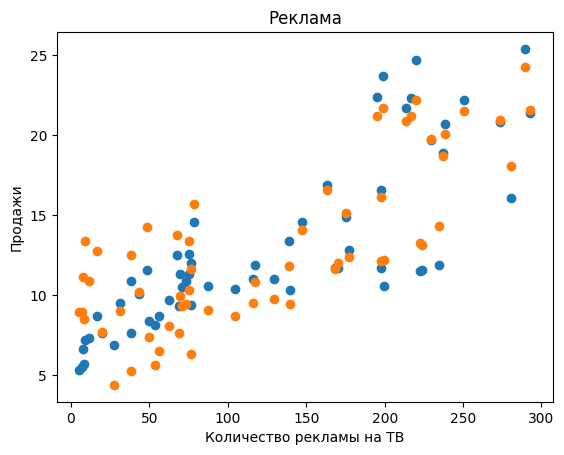

In [97]:
# Сравнение тестовой группы и обученной модели
# Канал ТВ
plt.title('Реклама')
plt.ylabel('Продажи')
plt.xlabel('Количество рекламы на ТВ')
plt.scatter(X_test['TV'], Y_test)
plt.scatter(X_test['TV'], Y_new);

In [79]:
# Оценка модели по мерам изменчивости

### Метрики

Для регрессионных задач наиболее часто используются следующие три метрики:

**Средняя абсолютная ошибка - Mean Absolute Error** (MAE) - усредняет абсолютные значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Среднеквадратическая ошибка - Mean Squared Error** (MSE) - усредняет квадраты ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Среднеквадратическое отклонение - Root Mean Squared Error** (RMSE) - квадратный корень от среднеквадратической ошибки:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Сравнение метрик:

- **MAE** проще всего понять - это просто средняя ошибка.
- **MSE** более популярнее MAE, потому что MSE больше "наказывает" большие ошибки, и обычно это более полезно в прикладных задачах.
- **RMSE** даже ещё более популярна, чем MSE, потому что RMSE измеряется в тех же единицах, что и "y".

Все эти метрики являются **функциями потери (loss functions)**, потому что мы стремимся уменьшить их.

In [80]:
df['sales'].mean()

np.float64(14.0225)

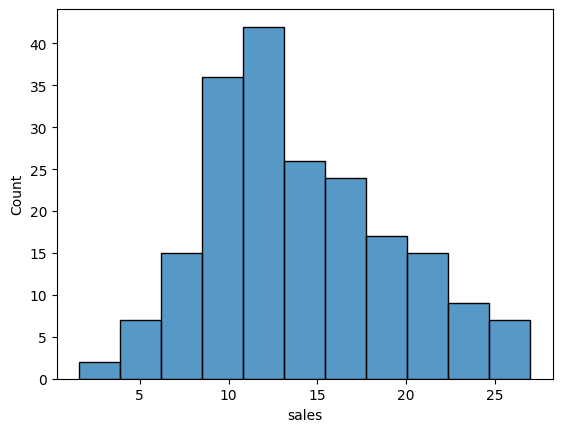

In [81]:
sns.histplot(data = df, x = 'sales'); # так можем узнать частоту продаж по определенной цене

In [82]:
# понятная метрика
mean_absolute_error(Y_test, Y_new) # сначала пишем значение тестовые, затем предсказанные
# за Y отвечает df['sales'], поэтому данную ошибку можно сравнивать со средним значением

1.5116692224549086

In [83]:
# ошибка составляет примерно 11 процентов
mean_absolute_error(Y_test, Y_new)/df['sales'].mean()*100
# принимаем ли это или нет зависит уже от конкретной задачи

np.float64(10.780311802138767)

In [84]:
mean_squared_error(Y_test, Y_new)**(1/2) # ошибка выше относительно другой метрики

1.9485372043446387

In [85]:
mean_squared_error(Y_test, Y_new)**(1/2)/df['sales'].mean()*100
# 14 процентов говорит,что в некоторых точках модель сильно ошибается

np.float64(13.8957903679418)

## Остатки (Residuals)

Квартет Энскомба: [ссылка на википедию](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0).

Первый пример - сохранение линейности. Второй - нет!

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

In [34]:
# Анализ остатков
test_residuals = Y_test - Y_new

In [111]:
# коэффициенты для построения линейной регрессии
model.coef_
model.intercept_

np.float64(2.7089490925159065)

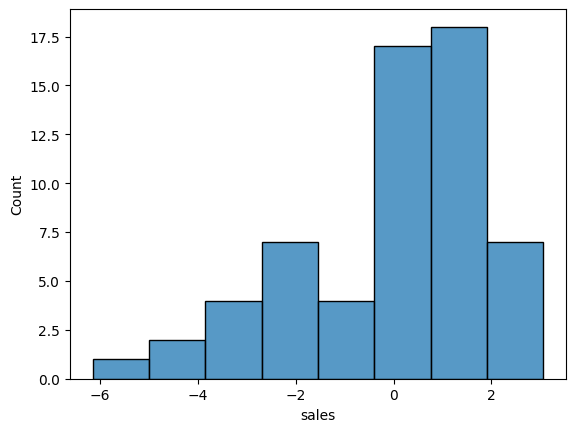

In [53]:
sns.histplot(x=test_residuals);

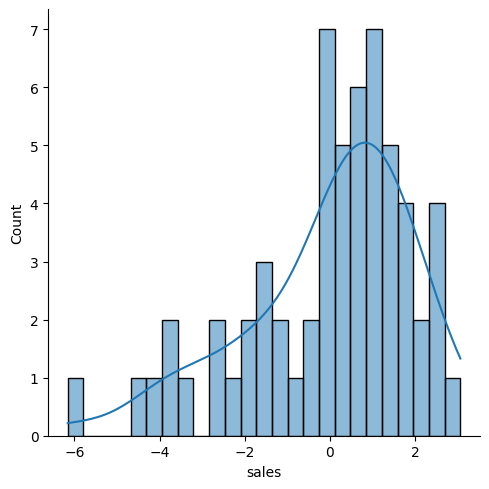

In [60]:
# оценка плотности вероятности случайной величины
sns.displot(test_residuals, bins=25, kde = True); # разница в данных по сравнение с верхей гистрограммой - количество интервалов bins

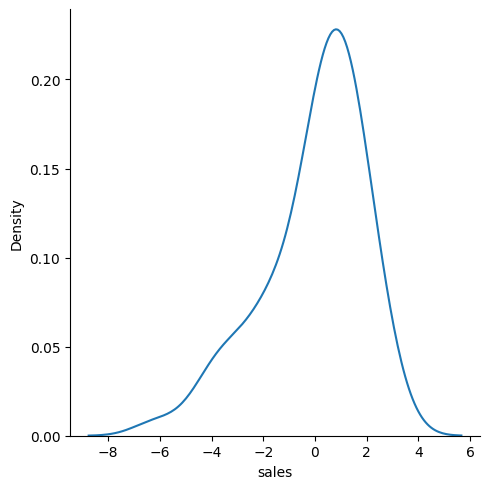

In [59]:
sns.displot(test_residuals, kind='kde'); # если хотим плотность вероятности посчитать отдельно

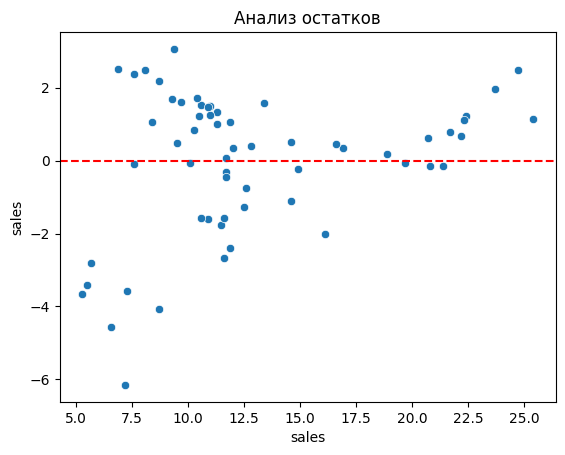

In [ ]:
# Анализ остатков с помощью диаграммы рассеяния
plt.axhline(y = 0, color = 'red', ls='--')
plt.title('Анализ остатков')
sns.scatterplot(x=Y_test, y = test_residuals);

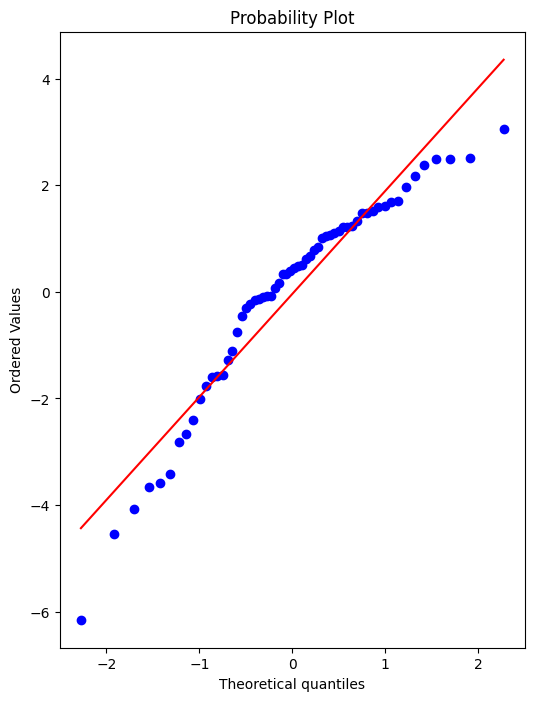

In [113]:
# probplot аналогичен qqplot. Проверка на нормальность данных

fig, ax = plt.subplots(figsize=(6,8),dpi=100)

_ = sp.stats.probplot(test_residuals,plot=ax)

In [114]:
# Если всё по метрикам устраивает, то следующий шаг - внедреннее модели
# пока пропустили шаг по настройки модели (полиномиальная регрессия и регурялизация)

In [117]:
# Тогда применяем линейную регрессию
final_model = LinearRegression()
final_model.fit(X,Y) # теперь обучаем модель на всех данных

LinearRegression()

In [120]:
final_model.coef_
# модели кажется, что затраты на рекламу никак не влияют на количество купленых газет

array([ 0.04576465,  0.18853002, -0.00103749])

In [119]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [124]:
dump(final_model, 'final_sales_model.joblib') # сохраняем эту модель для передачи данных
# loaded_model = load('final_sales_model.joblib') # выгрузка данных

['final_sales_model.joblib']